# Task 1

---

## Web scraping and analysis

We will use a package called `BeautifulSoup` to collect the data from the web. Once we've collected our data and saved it into a local `.csv` file we will start our analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

In [ ]:
df.to_csv("BA_reviews.csv")

Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing to do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [37]:
# Load the British Airline Reveiws dataset into a DataFrame
BA_reveiws = pd.read_csv('BA_reviews.csv')

In [38]:
# Print the first few rows of the BA_reviews datasets
print(BA_reveiws.head())

   Unnamed: 0                                            reviews
0           0  Not Verified |  Everything was ok until our co...
1           1  Not Verified |  My initial flight was cancelle...
2           2  Not Verified |  We will never fly British Airw...
3           3  ✅ Trip Verified | Check in and security cleara...
4           4  Not Verified |  British Airways has confirmed ...


## Data Cleaning

In [39]:
# Remove unnecessary text such as '✅ Trip Verified' and 'Not Verified'
BA_reveiws['reviews'] = BA_reveiws['reviews'].str.replace('Not Verified |', '').str.replace('✅ Trip Verified |', '')
BA_reveiws['reviews'] = BA_reveiws['reviews'].str.replace('|', '').str.replace('|', '')

C:\Users\user\AppData\Local\Temp\ipykernel_3376\3642508881.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  BA_reveiws['reviews'] = BA_reveiws['reviews'].str.replace('Not Verified |', '').str.replace('✅ Trip Verified |', '')
C:\Users\user\AppData\Local\Temp\ipykernel_3376\3642508881.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  BA_reveiws['reviews'] = BA_reveiws['reviews'].str.replace('|', '').str.replace('|', '')


## Word Cloud of Reveiws

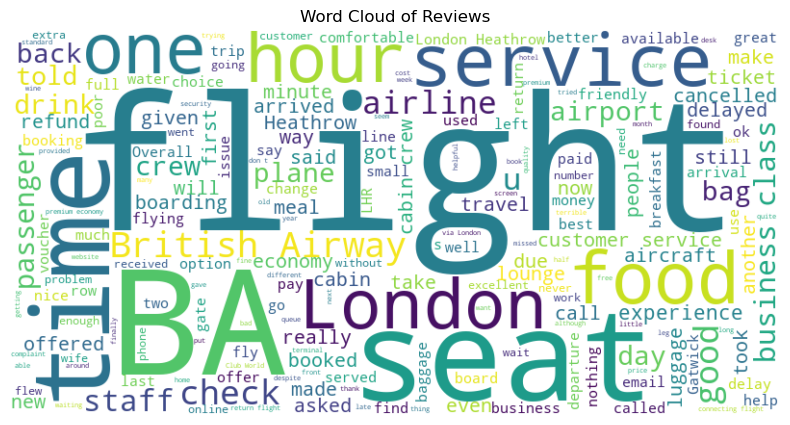

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into one string
all_reviews = ' '.join(BA_reveiws['reviews'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()


In [41]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Calculate sentiment scores
BA_reveiws['Sentiment'] = BA_reveiws['reviews'].apply(lambda x: sid.polarity_scores(x))

# Extract the compound sentiment score
BA_reveiws['Compound Sentiment'] = BA_reveiws['Sentiment'].apply(lambda x: x['compound'])

# Display the DataFrame with sentiment scores
print(BA_reveiws[['reviews', 'Compound Sentiment']])


                                               reviews  Compound Sentiment
0      Everything was ok until our connecting fligh...             -0.9348
1      My initial flight was cancelled 8 hours prio...             -0.8481
2      We will never fly British Airways again. Our...             -0.6366
3     Check in and security clearance very quick at...              0.8590
4      British Airways has confirmed itself as the ...             -0.7430
..                                                 ...                 ...
995    London Heathrow to Stuttgart. Absolutely dis...              0.2040
996    London to Johannesburg. Turning right to the...              0.9943
997    Having booked BA Business Class and paid ext...             -0.9552
998    Vancouver to London Heathrow. I chose to fly...              0.8975
999    Boston to Nairobi via London. The only good ...              0.3919

[1000 rows x 2 columns]


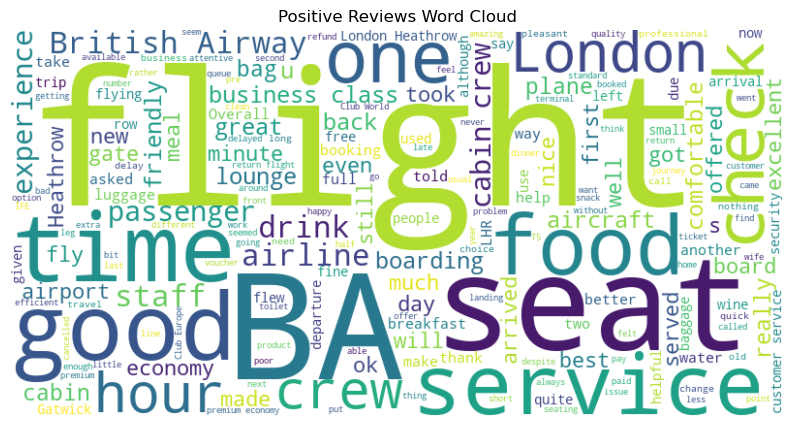

In [42]:
# Sentiment from word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate reviews into positive, negative, and neutral based on sentiment score
positive_reviews = BA_reveiws[BA_reveiws['Compound Sentiment'] > 0]['reviews']
negative_reviews = BA_reveiws[BA_reveiws['Compound Sentiment'] < 0]['reviews']
neutral_reviews = BA_reveiws[BA_reveiws['Compound Sentiment'] == 0]['reviews']

# Generate word clouds for each sentiment category
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Positive Reviews word clouds
generate_word_cloud(' '.join(positive_reviews), 'Positive Reviews Word Cloud')


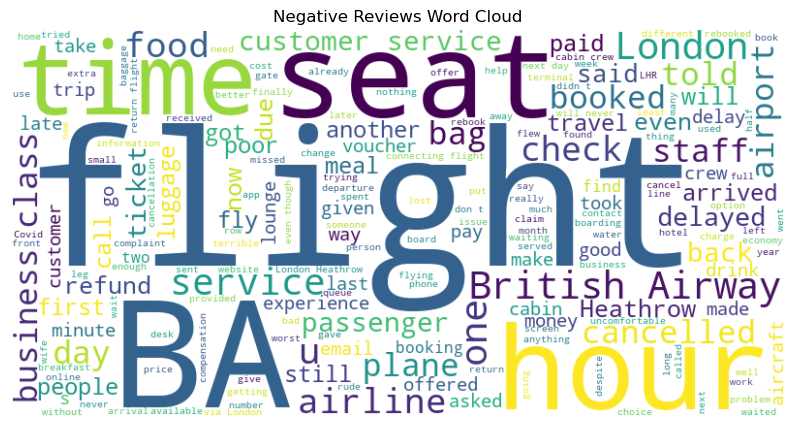

In [43]:
# Negative Reviews Word Cloud
generate_word_cloud(' '.join(negative_reviews), 'Negative Reviews Word Cloud')

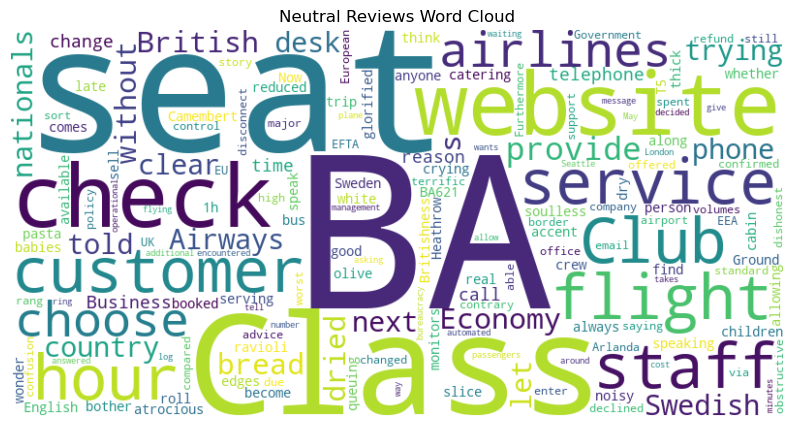

In [44]:
# Neutral Reviews Word Cloud
generate_word_cloud(' '.join(neutral_reviews), 'Neutral Reviews Word Cloud')

In [46]:
import nltk

# Download the vader_lexicon resource
#nltk.download('vader_lexicon')


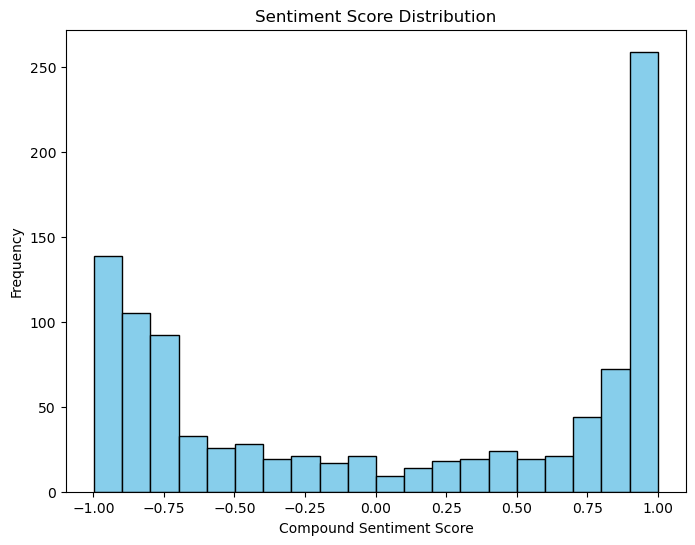

In [47]:
# 1. Sentiment Score Distribution
plt.figure(figsize=(8, 6))
plt.hist(BA_reveiws['Compound Sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [48]:
# 2. Summary Statistics
mean_sentiment = BA_reveiws['Compound Sentiment'].mean()
median_sentiment = BA_reveiws['Compound Sentiment'].median()
std_dev_sentiment = BA_reveiws['Compound Sentiment'].std()
print(f"Mean Sentiment: {mean_sentiment}")
print(f"Median Sentiment: {median_sentiment}")
print(f"Standard Deviation of Sentiment: {std_dev_sentiment}")

Mean Sentiment: 0.0382924
Median Sentiment: 0.0
Standard Deviation of Sentiment: 0.7893031334656786


## Keywords Frequency Distributionin Customer Reviews of Birtish Airways

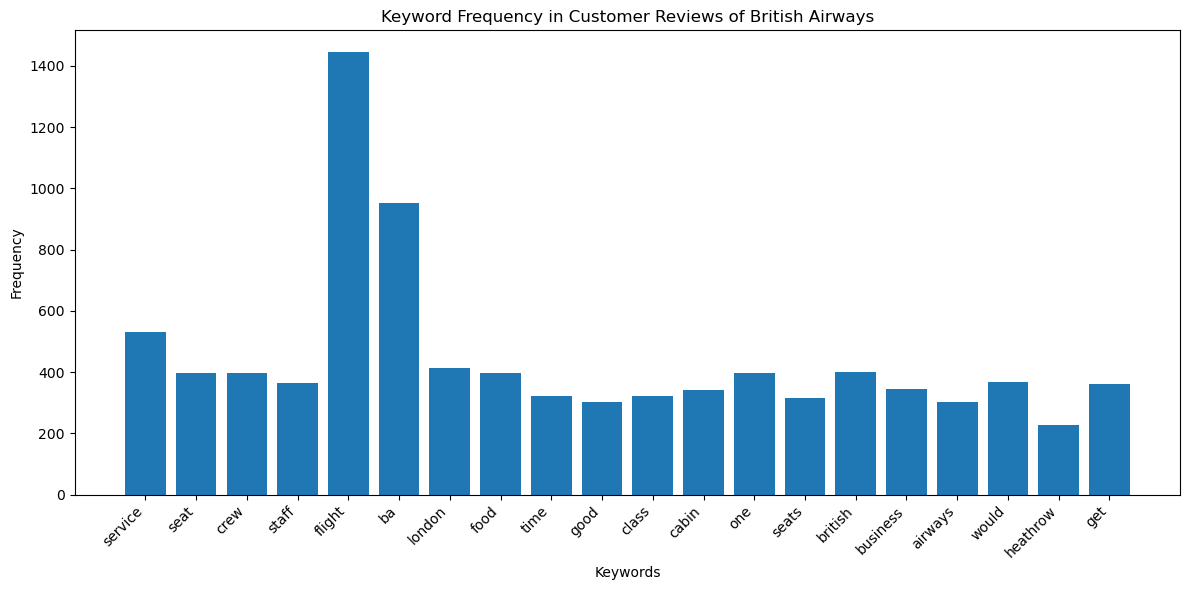

In [52]:
# Keywords
keywords = ['service', 'seat', 'crew', 'staff', 'flight', 'ba', 'london', 'food', 'time', 'good', 'class', 'cabin', 'one', 'seats', 'one', 'british', 'business', 'airways', 'would', 'heathrow', 'get']

# Initialize a dictionary to store keyword frequencies
keyword_freq = {keyword: 0 for keyword in keywords}

# Tokenize and count keyword frequencies in customer reviews
for review in BA_reveiws['reviews']:
    review = review.lower()
    words = review.split()
    for word in words:
        if word in keyword_freq:
            keyword_freq[word] += 1

# Create a frequency chart
plt.figure(figsize=(12, 6))
plt.bar(keyword_freq.keys(), keyword_freq.values())
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Keyword Frequency in Customer Reviews of British Airways')
plt.xticks(rotation=45, ha="right")

# Display the chart
plt.tight_layout()
plt.show()


[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


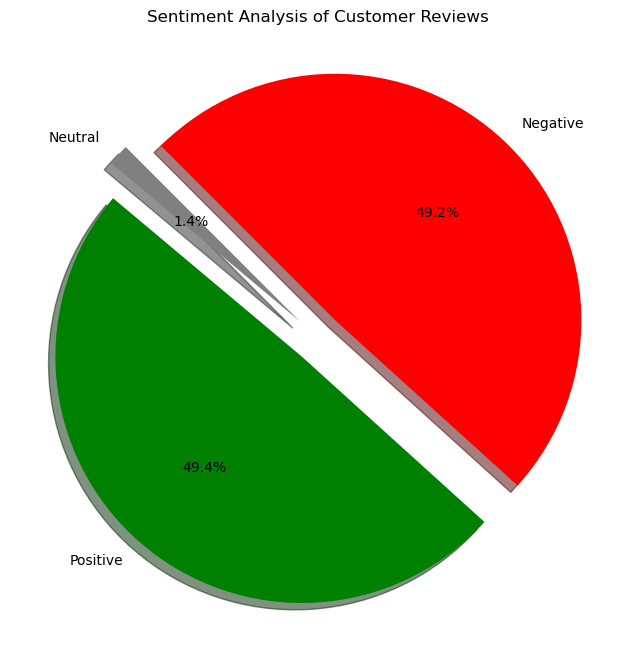

Positive reviews: 49.40%
Negative reviews: 49.20%
Neutral reviews: 1.40%


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Analyze sentiment for each review and categorize as positive, negative, or neutral
positive_reviews = 0
negative_reviews = 0
neutral_reviews = 0

for review in BA_reveiws['reviews']:
    sentiment_scores = analyzer.polarity_scores(review)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        positive_reviews += 1
    elif compound_score <= -0.05:
        negative_reviews += 1
    else:
        neutral_reviews += 1

# Calculate percentages
total_reviews = len(BA_reveiws['reviews'])
positive_percentage = (positive_reviews / total_reviews) * 100
negative_percentage = (negative_reviews / total_reviews) * 100
neutral_percentage = (neutral_reviews / total_reviews) * 100

# Create a pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_percentage, negative_percentage, neutral_percentage]
colors = ['green', 'red', 'gray']
explode = (0.1, 0.1, 0.1)  # Explode slices

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Sentiment Analysis of Customer Reviews')
plt.show()

# Print the percentages
print(f"Positive reviews: {positive_percentage:.2f}%")
print(f"Negative reviews: {negative_percentage:.2f}%")
print(f"Neutral reviews: {neutral_percentage:.2f}%")


From our Analysis we can that there is a little bit of difference between the positive reviews and negative reviews